<a href="https://colab.research.google.com/github/Byasadeba/Redwine/blob/master/Cricket_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
# importing the dataset
from google.colab import drive
drive.mount('/content/drive')

df = pd.read_csv("/content/drive/My Drive/Colab Notebooks/Intellipaat/Weekend_ML_Batch/Hierarchical_Clustering/Cricket.csv",encoding='latin1')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df.head()

,Player,Span,Mat,Inns,NO,Runs,HS,Ave,BF,SR,100,50,0
0,SR Tendulkar (INDIA),1989-2012,463,452,41,18426,200*,44.83,21367,86.23,49,96,20
1,KC Sangakkara (Asia/ICC/SL),2000-2015,404,380,41,14234,169,41.98,18048,78.86,25,93,15
2,RT Ponting (AUS/ICC),1995-2012,375,365,39,13704,164,42.03,17046,80.39,30,82,20
3,ST Jayasuriya (Asia/SL),1989-2011,445,433,18,13430,189,32.36,14725,91.20,28,68,34
4,DPMD Jayawardene (Asia/SL),1998-2015,448,418,39,12650,144,33.37,16020,78.96,19,77,28


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79 entries, 0 to 78
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Player  79 non-null     object 
 1   Span    79 non-null     object 
 2   Mat     79 non-null     int64  
 3   Inns    79 non-null     int64  
 4   NO      79 non-null     int64  
 5   Runs    79 non-null     int64  
 6   HS      79 non-null     object 
 7   Ave     79 non-null     float64
 8   BF      79 non-null     int64  
 9   SR      79 non-null     float64
 10  100     79 non-null     int64  
 11  50      79 non-null     int64  
 12  0       79 non-null     int64  
dtypes: float64(2), int64(8), object(3)
memory usage: 8.1+ KB


In [ ]:
df['HS'] = df.HS.str.replace("*","")

<ipython-input-87-31b54793c64b>:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['HS'] = df.HS.str.replace("*","")


In [ ]:
df.head()

,Player,Span,Mat,Inns,NO,Runs,HS,Ave,BF,SR,100,50,0
0,SR Tendulkar (INDIA),1989-2012,463,452,41,18426,200,44.83,21367,86.23,49,96,20
1,KC Sangakkara (Asia/ICC/SL),2000-2015,404,380,41,14234,169,41.98,18048,78.86,25,93,15
2,RT Ponting (AUS/ICC),1995-2012,375,365,39,13704,164,42.03,17046,80.39,30,82,20
3,ST Jayasuriya (Asia/SL),1989-2011,445,433,18,13430,189,32.36,14725,91.20,28,68,34
4,DPMD Jayawardene (Asia/SL),1998-2015,448,418,39,12650,144,33.37,16020,78.96,19,77,28


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79 entries, 0 to 78
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Player  79 non-null     object 
 1   Span    79 non-null     object 
 2   Mat     79 non-null     int64  
 3   Inns    79 non-null     int64  
 4   NO      79 non-null     int64  
 5   Runs    79 non-null     int64  
 6   HS      79 non-null     object 
 7   Ave     79 non-null     float64
 8   BF      79 non-null     int64  
 9   SR      79 non-null     float64
 10  100     79 non-null     int64  
 11  50      79 non-null     int64  
 12  0       79 non-null     int64  
dtypes: float64(2), int64(8), object(3)
memory usage: 8.1+ KB


In [ ]:
df['HS'] = df.HS.astype(int)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79 entries, 0 to 78
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Player  79 non-null     object 
 1   Span    79 non-null     object 
 2   Mat     79 non-null     int64  
 3   Inns    79 non-null     int64  
 4   NO      79 non-null     int64  
 5   Runs    79 non-null     int64  
 6   HS      79 non-null     int64  
 7   Ave     79 non-null     float64
 8   BF      79 non-null     int64  
 9   SR      79 non-null     float64
 10  100     79 non-null     int64  
 11  50      79 non-null     int64  
 12  0       79 non-null     int64  
dtypes: float64(2), int64(9), object(2)
memory usage: 8.1+ KB


In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Mat,79.0,245.075949,74.211716,128.00,188.000,232.00,281.500,463.00
Inns,79.0,230.544304,70.321022,127.00,177.000,217.00,261.500,452.00
NO,79.0,30.037975,14.421710,4.00,17.500,29.00,40.000,70.00
Runs,79.0,7618.139241,2551.873313,5080.00,5759.000,6798.00,8739.500,18426.00
HS,79.0,149.253165,31.285070,96.00,125.500,144.00,167.500,264.00
Ave,79.0,38.523291,5.919093,23.57,34.600,37.87,41.845,53.94
BF,79.0,9684.455696,3193.835825,5504.00,7393.500,9134.00,10976.000,21367.00
SR,79.0,79.295316,9.925307,60.57,73.725,77.73,85.180,117.00
100,79.0,11.556962,8.092014,0.00,6.000,10.00,15.500,49.00
50,79.0,46.443038,16.351701,23.00,34.500,42.00,54.000,96.00


In [ ]:
# null values

df.isnull().sum()

Player    0
Span      0
Mat       0
Inns      0
NO        0
Runs      0
HS        0
Ave       0
BF        0
SR        0
100       0
50        0
0         0
dtype: int64

In [ ]:
# to convert the span into years of experience
# we first split the span into start and end and store in new column

df[['Strt','End']] = df.Span.str.split("-",expand=True)

In [ ]:
df.head()

,Player,Span,Mat,Inns,NO,Runs,HS,Ave,BF,SR,100,50,0,Strt,End
0,SR Tendulkar (INDIA),1989-2012,463,452,41,18426,200,44.83,21367,86.23,49,96,20,1989,2012
1,KC Sangakkara (Asia/ICC/SL),2000-2015,404,380,41,14234,169,41.98,18048,78.86,25,93,15,2000,2015
2,RT Ponting (AUS/ICC),1995-2012,375,365,39,13704,164,42.03,17046,80.39,30,82,20,1995,2012
3,ST Jayasuriya (Asia/SL),1989-2011,445,433,18,13430,189,32.36,14725,91.20,28,68,34,1989,2011
4,DPMD Jayawardene (Asia/SL),1998-2015,448,418,39,12650,144,33.37,16020,78.96,19,77,28,1998,2015


In [ ]:
# convert them as int and
# find years of exp as end year - start year
# later drop the unneceassry columns such as start, end and span
# we are only left with the experience column now

df[['Strt','End']]=df[['Strt','End']].astype(int)
df['Exp']=df['End']-df['Strt']
df=df.drop(['Strt','End','Span'], axis = 1)
df.head()

,Player,Mat,Inns,NO,Runs,HS,Ave,BF,SR,100,50,0,Exp
0,SR Tendulkar (INDIA),463,452,41,18426,200,44.83,21367,86.23,49,96,20,23
1,KC Sangakkara (Asia/ICC/SL),404,380,41,14234,169,41.98,18048,78.86,25,93,15,15
2,RT Ponting (AUS/ICC),375,365,39,13704,164,42.03,17046,80.39,30,82,20,17
3,ST Jayasuriya (Asia/SL),445,433,18,13430,189,32.36,14725,91.20,28,68,34,22
4,DPMD Jayawardene (Asia/SL),448,418,39,12650,144,33.37,16020,78.96,19,77,28,17


In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Mat,79.0,245.075949,74.211716,128.00,188.000,232.00,281.500,463.00
Inns,79.0,230.544304,70.321022,127.00,177.000,217.00,261.500,452.00
NO,79.0,30.037975,14.421710,4.00,17.500,29.00,40.000,70.00
Runs,79.0,7618.139241,2551.873313,5080.00,5759.000,6798.00,8739.500,18426.00
HS,79.0,149.253165,31.285070,96.00,125.500,144.00,167.500,264.00
Ave,79.0,38.523291,5.919093,23.57,34.600,37.87,41.845,53.94
BF,79.0,9684.455696,3193.835825,5504.00,7393.500,9134.00,10976.000,21367.00
SR,79.0,79.295316,9.925307,60.57,73.725,77.73,85.180,117.00
100,79.0,11.556962,8.092014,0.00,6.000,10.00,15.500,49.00
50,79.0,46.443038,16.351701,23.00,34.500,42.00,54.000,96.00


In [ ]:
df.shape

(79, 13)

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df.columns

Index(['Player', 'Mat', 'Inns', 'NO', 'Runs', 'HS', 'Ave', 'BF', 'SR', '100',
       '50', '0', 'Exp'],
      dtype='object')

Mat


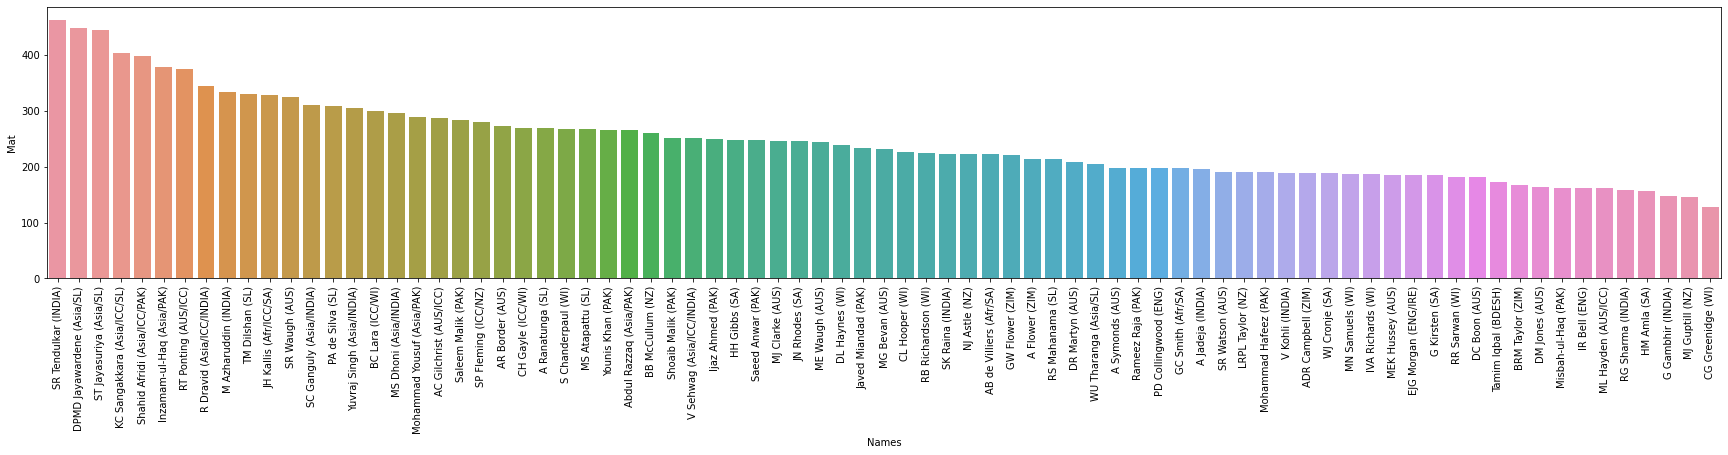

Inns


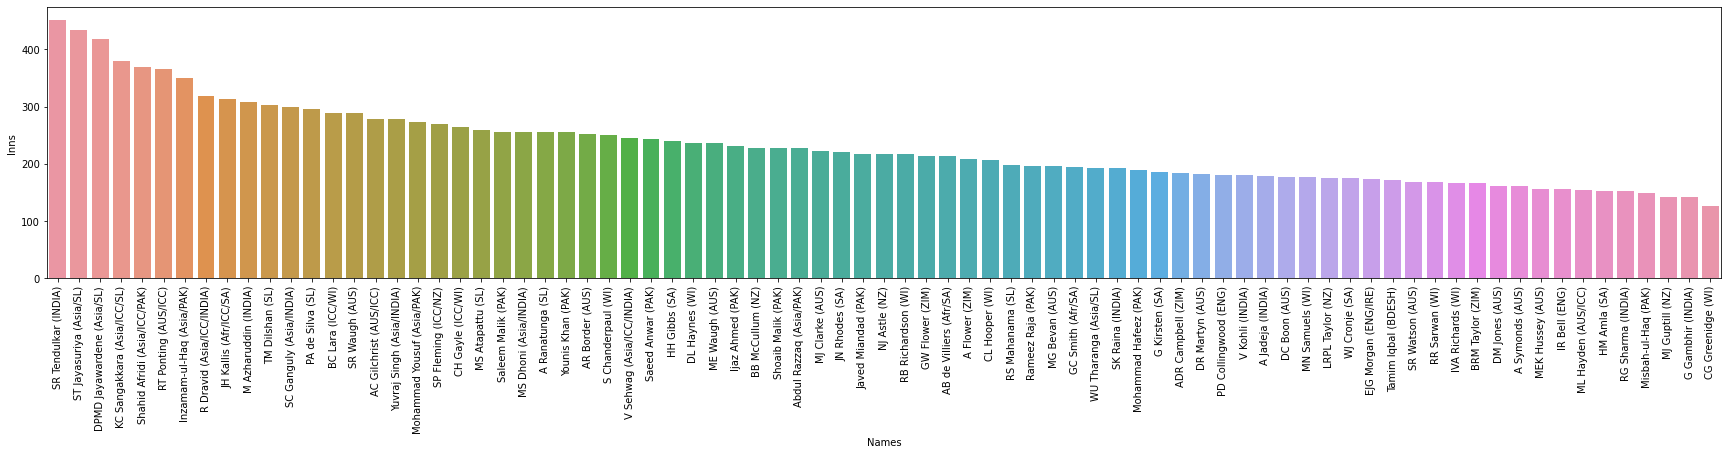

NO


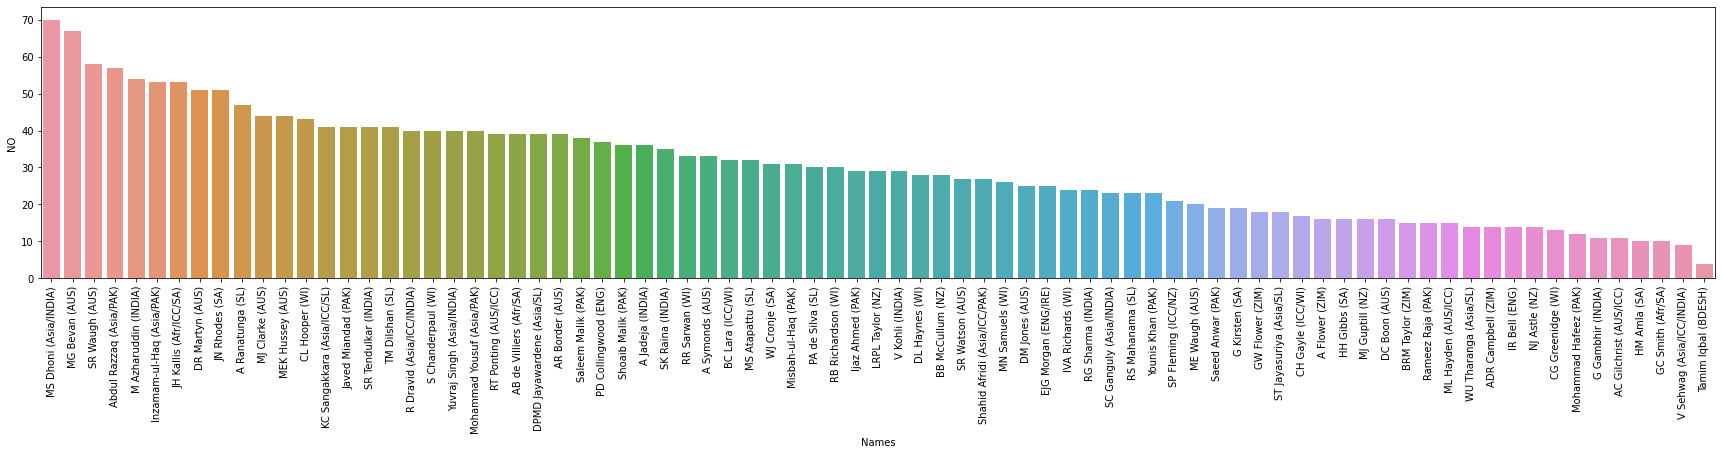

Runs


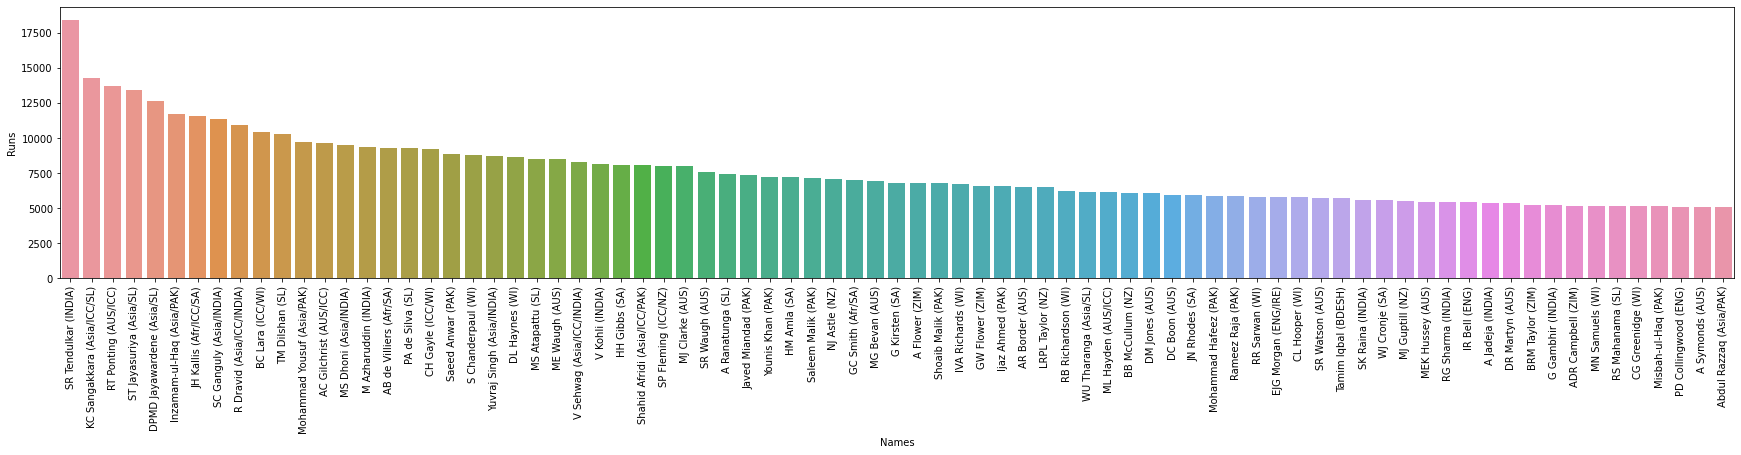

HS


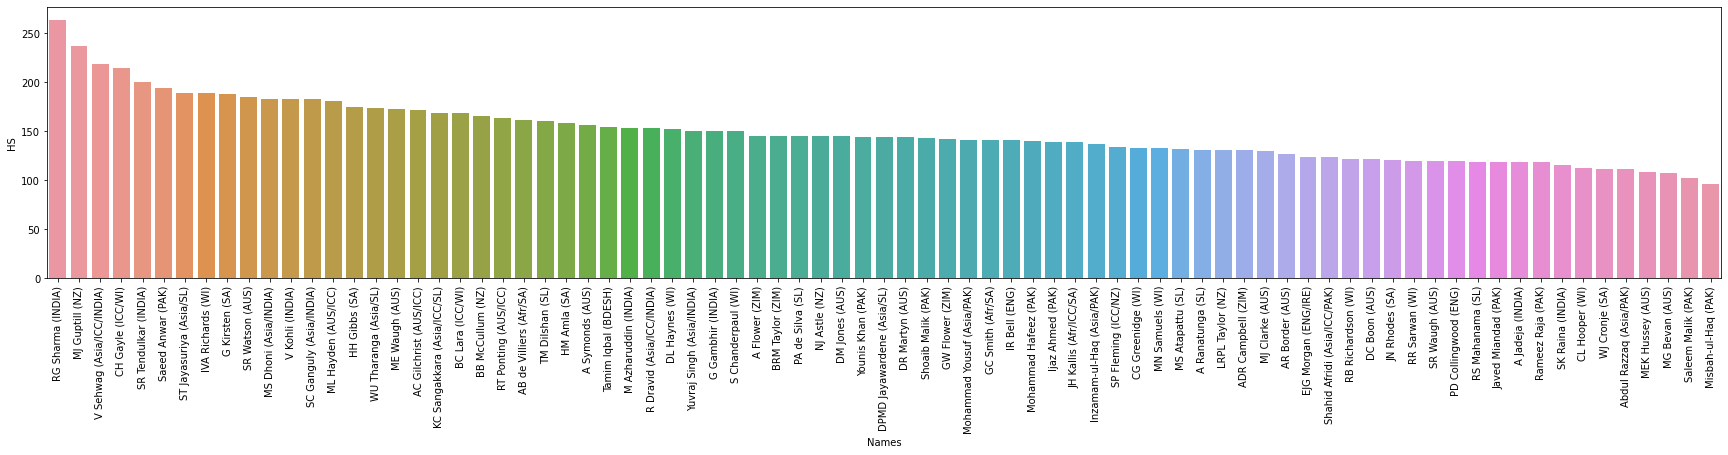

Ave


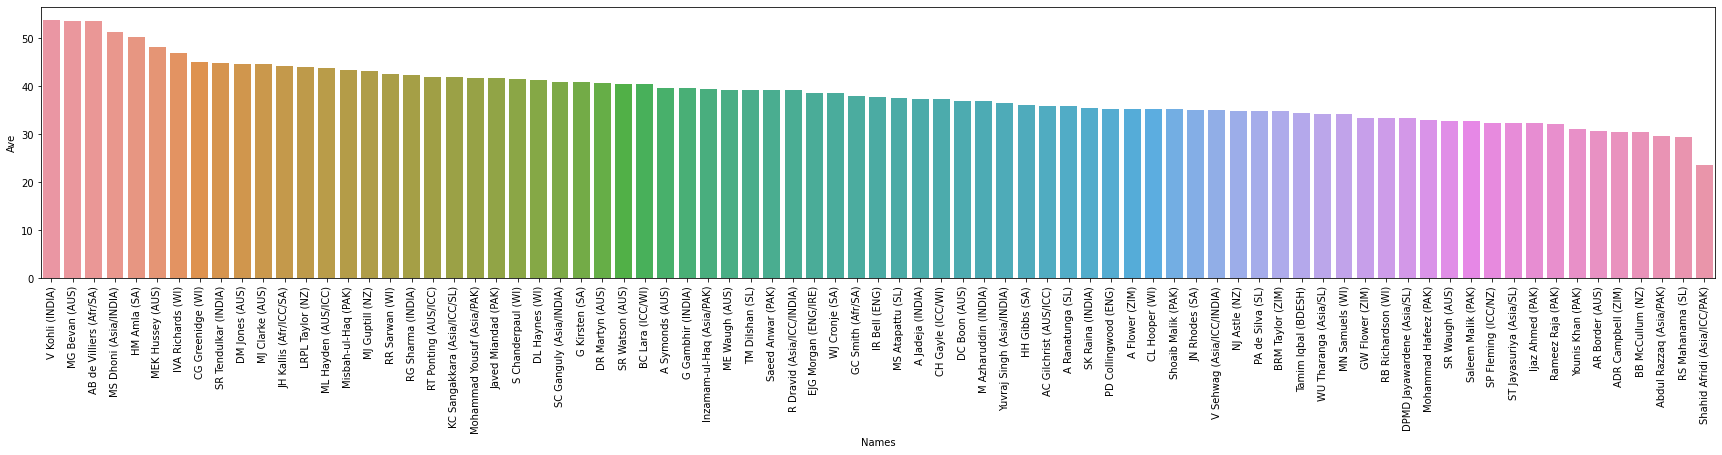

BF


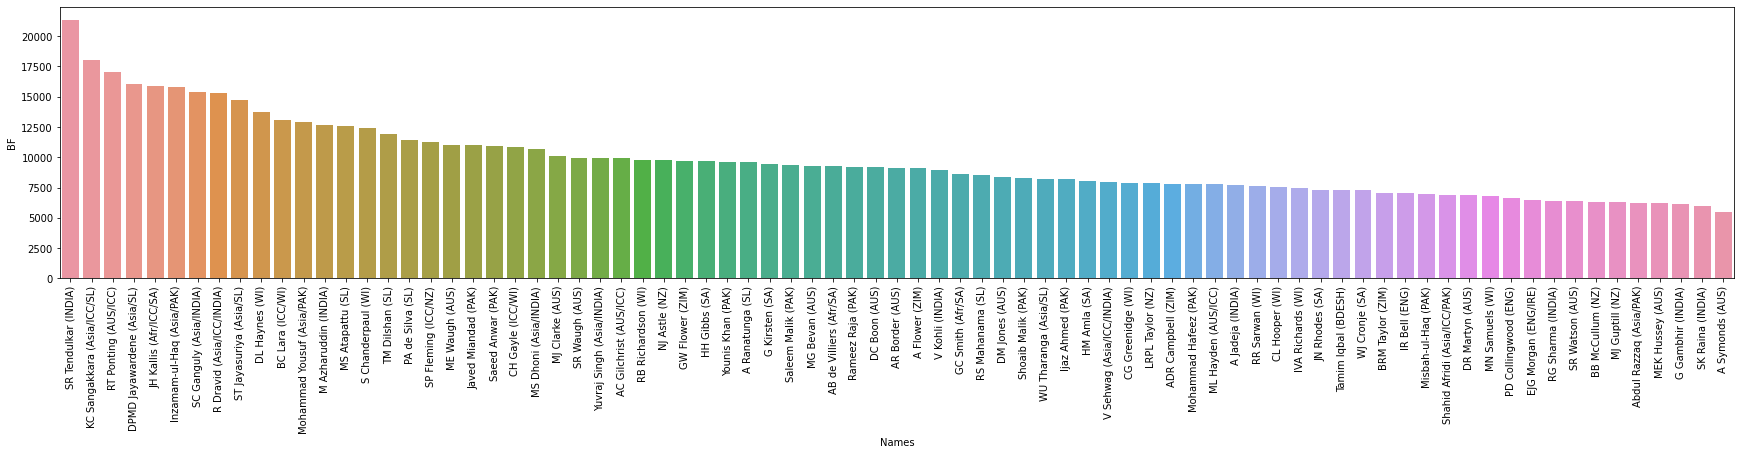

SR


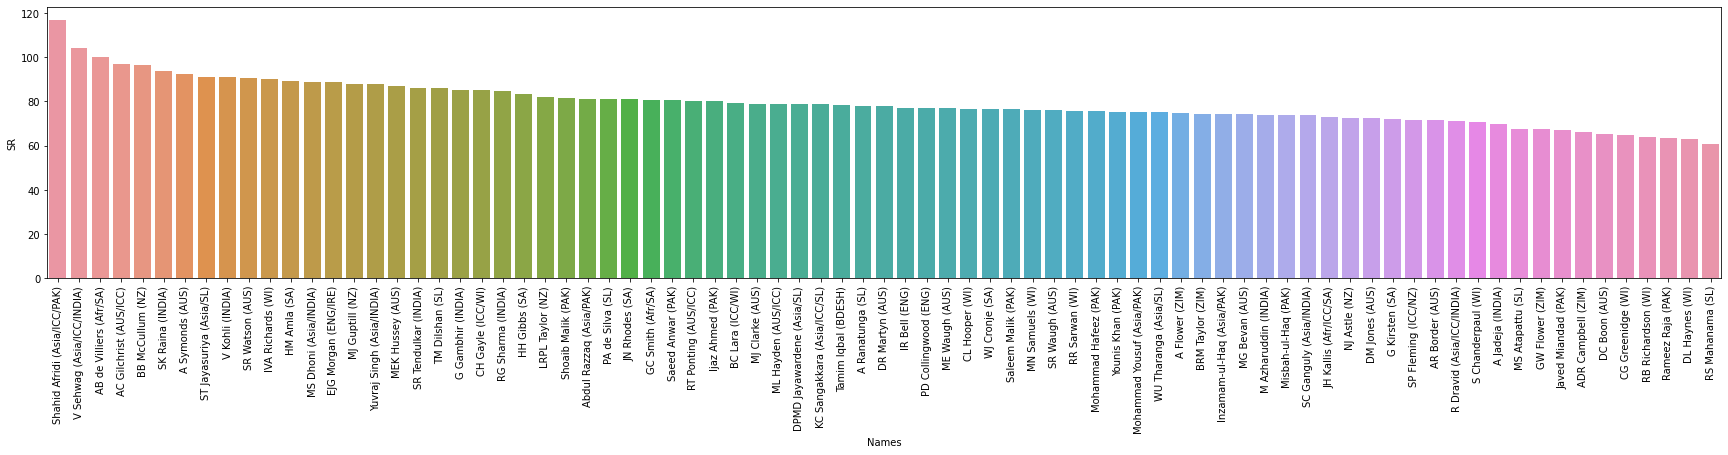

100


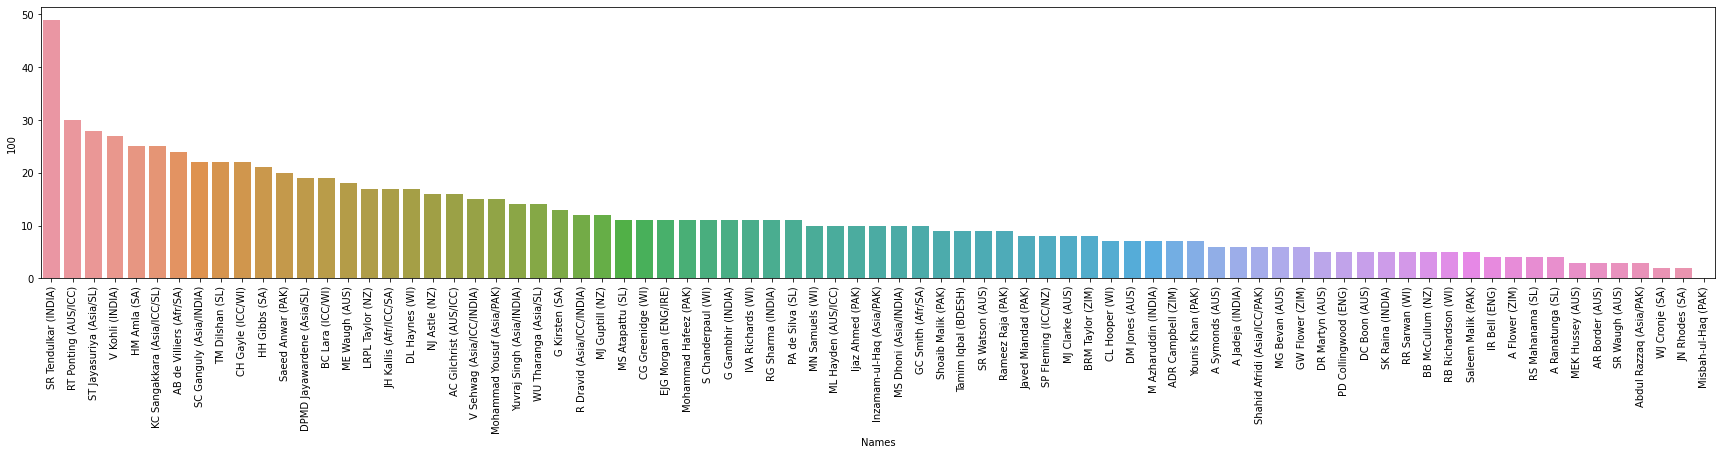

50


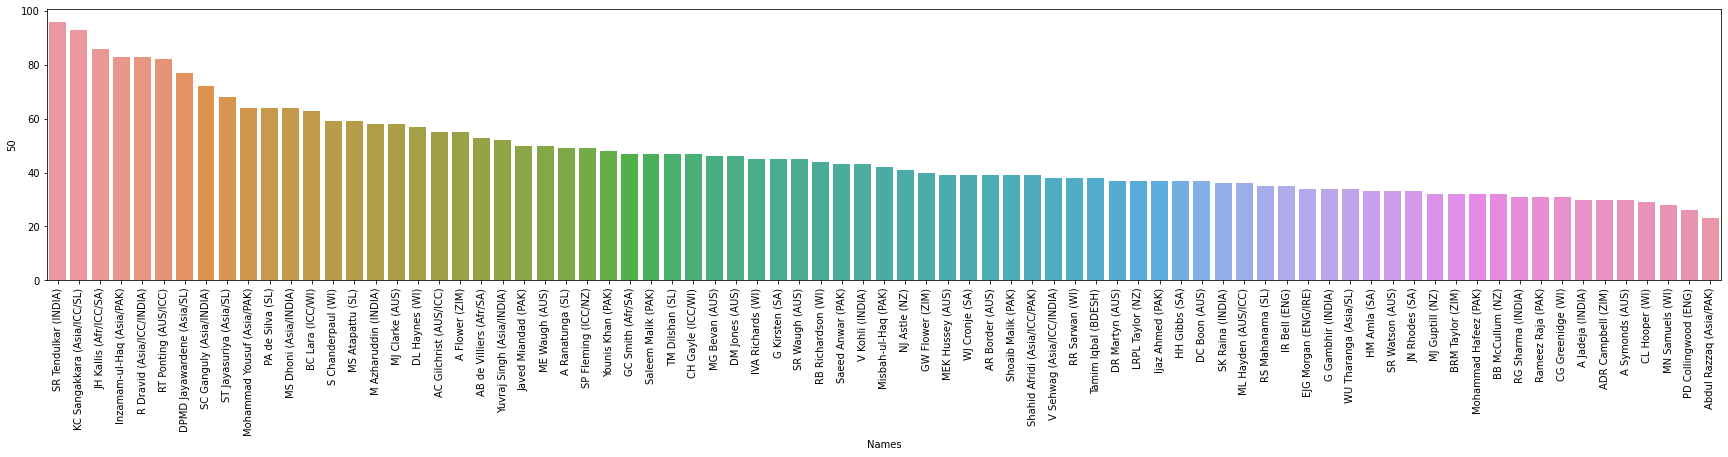

0


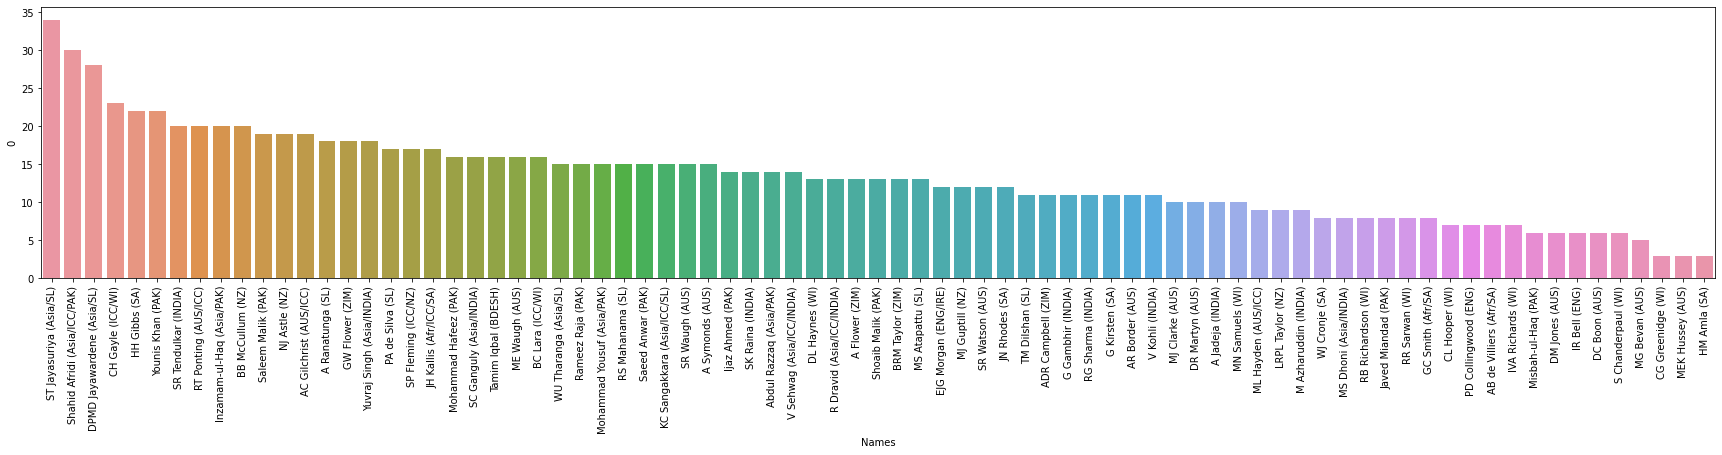

Exp


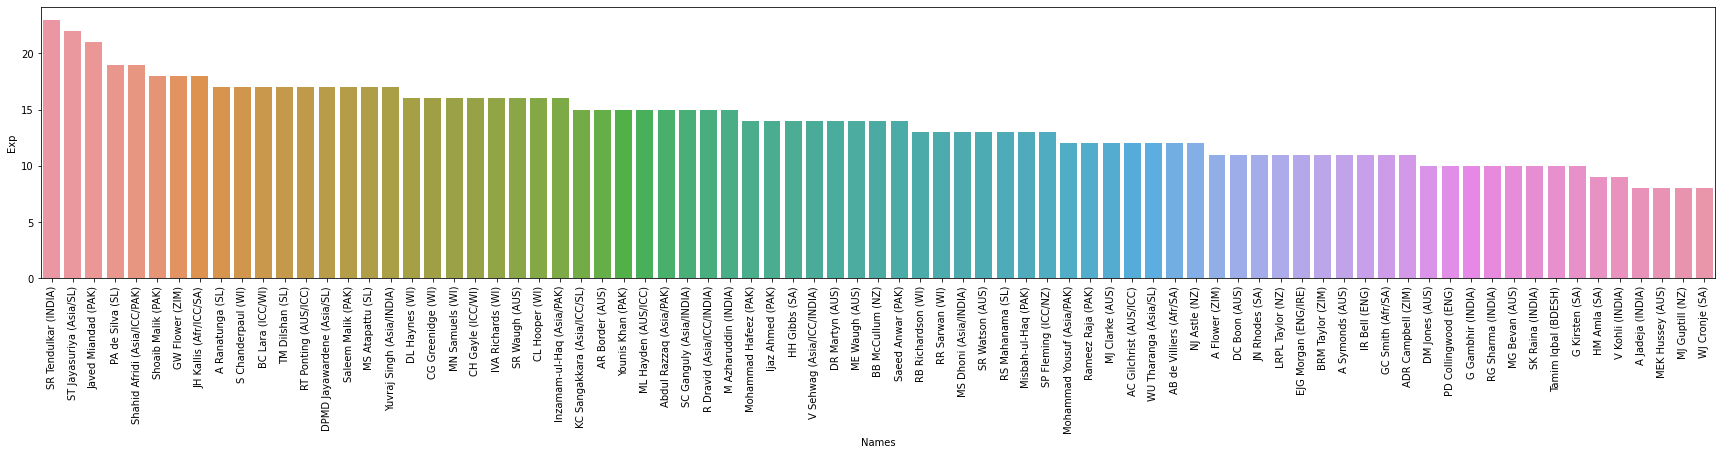

In [ ]:
for col in df.columns:
  if(col!='Player'):
    print(col)
    plt.figure(figsize = (30,5))
    mat = df[['Player',col]].sort_values(col, ascending = False)
    ax = sns.barplot(x='Player', y=col, data= mat)
    ax.set(xlabel = 'Names', ylabel= col)
    plt.xticks(rotation=90)
    plt.show()


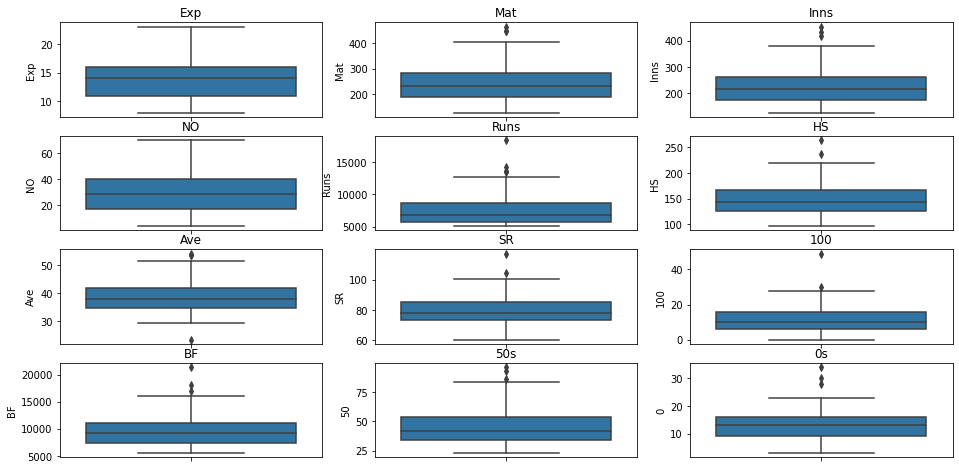

In [ ]:
f, axes = plt.subplots(4,3, figsize=(16, 8))
s=sns.boxplot(y=df.Exp,ax=axes[0, 0])
axes[0, 0].set_title('Exp')
s=sns.boxplot(y=df.Mat,ax=axes[0, 1])
axes[0, 1].set_title('Mat')
s=sns.boxplot(y=df.Inns,ax=axes[0, 2])
axes[0, 2].set_title('Inns')

s=sns.boxplot(y=df.NO,ax=axes[1, 0])
axes[1, 0].set_title('NO')
s=sns.boxplot(y=df.Runs,ax=axes[1, 1])
axes[1, 1].set_title('Runs')
s=sns.boxplot(y=df.HS,ax=axes[1, 2])
axes[1, 2].set_title('HS')

s=sns.boxplot(y=df.Ave,ax=axes[2, 0])
axes[2, 0].set_title('Ave')
s=sns.boxplot(y=df.SR,ax=axes[2, 1])
axes[2, 1].set_title('SR')
s=sns.boxplot(y=df['100'],ax=axes[2, 2])
axes[2, 2].set_title('100')
s=sns.boxplot(y=df.BF,ax=axes[3, 0])
axes[3, 0].set_title('BF')
s=sns.boxplot(y=df['50'],ax=axes[3, 1])
axes[3, 1].set_title('50s')
s=sns.boxplot(y=df['0'],ax=axes[3, 2])
axes[3, 2].set_title('0s')
plt.show()

In [ ]:
# Dropping Player field as final dataframe will only contain data columns

df_drop = df.copy()
player = df_drop.pop('Player')

In [ ]:
df_drop

,Mat,Inns,NO,Runs,HS,Ave,BF,SR,100,50,0,Exp
0,463,452,41,18426,200,44.83,21367,86.23,49,96,20,23
1,404,380,41,14234,169,41.98,18048,78.86,25,93,15,15
2,375,365,39,13704,164,42.03,17046,80.39,30,82,20,17
3,445,433,18,13430,189,32.36,14725,91.20,28,68,34,22
4,448,418,39,12650,144,33.37,16020,78.96,19,77,28,17
...,...,...,...,...,...,...,...,...,...,...,...,...
74,128,127,13,5134,133,45.03,7908,64.92,11,31,3,16
75,162,149,31,5122,96,43.40,6945,73.75,0,42,6,13
76,197,181,37,5092,120,35.36,6614,76.98,5,26,7,10
77,198,161,33,5088,156,39.75,5504,92.44,6,30,15,11


In [ ]:
# Rescaling the Features

In [ ]:
import sklearn
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_drop)
df_scaled

array([[ 2.95528204e+00,  3.16933340e+00,  7.64962749e-01,
         4.26232808e+00,  1.63244320e+00,  1.07229395e+00,
         3.68121424e+00,  7.03151526e-01,  4.65672622e+00,
         3.05005720e+00,  1.14583653e+00,  2.81278702e+00],
       [ 2.15517925e+00,  2.13891509e+00,  7.64962749e-01,
         2.60911662e+00,  6.35223595e-01,  5.87724608e-01,
         2.63538469e+00, -4.41394951e-02,  1.67188751e+00,
         2.86541772e+00,  2.96670622e-01,  3.80938324e-01],
       [ 1.76190839e+00,  1.92424461e+00,  6.25396797e-01,
         2.40009894e+00,  4.74381724e-01,  5.96225824e-01,
         2.31965067e+00,  1.10996904e-01,  2.29372891e+00,
         2.18840630e+00,  1.14583653e+00,  9.88900497e-01],
       [ 2.71118288e+00,  2.89741746e+00, -8.40045698e-01,
         2.29204075e+00,  1.27859108e+00, -1.04790945e+00,
         1.58829472e+00,  1.20709133e+00,  2.04499235e+00,
         1.32675540e+00,  3.52350108e+00,  2.50880593e+00],
       [ 2.75186607e+00,  2.68274698e+00,  6.2539679

In [ ]:
df_df1 = pd.DataFrame(df_scaled, columns = [ 'Mat', 'Inns', 'NO', 'Runs', 'HS', 'Ave', 'BF', 'SR', '100',
                                            '50', '0', 'Exp'])
df_df1.head()

,Mat,Inns,NO,Runs,HS,Ave,BF,SR,100,50,0,Exp
0,2.955282,3.169333,0.764963,4.262328,1.632443,1.072294,3.681214,0.703152,4.656726,3.050057,1.145837,2.812787
1,2.155179,2.138915,0.764963,2.609117,0.635224,0.587725,2.635385,-0.044139,1.671888,2.865418,0.296671,0.380938
2,1.761908,1.924245,0.625397,2.400099,0.474382,0.596226,2.319651,0.110997,2.293729,2.188406,1.145837,0.988900
3,2.711183,2.897417,-0.840046,2.292041,1.278591,-1.047909,1.588295,1.207091,2.044992,1.326755,3.523501,2.508806
4,2.751866,2.682747,0.625397,1.984430,-0.168986,-0.876185,1.996354,-0.034000,0.925678,1.880674,2.504502,0.988900


In [ ]:
df_df1.describe().T

,count,mean,std,min,25%,50%,75%,max
Mat,79.0,-5.551115e-17,1.00639,-1.587674,-0.774011,-0.177324,0.493949,2.955282
Inns,79.0,-7.316581e-17,1.00639,-1.481860,-0.766292,-0.193837,0.443018,3.169333
NO,79.0,9.837419e-17,1.00639,-1.817007,-0.874937,-0.072433,0.695180,2.788669
Runs,79.0,1.264811e-16,1.00639,-1.000973,-0.733194,-0.323441,0.442234,4.262328
HS,79.0,2.023698e-16,1.00639,-1.713068,-0.764101,-0.168986,0.586971,3.691219
Ave,79.0,5.621382e-17,1.00639,-2.542423,-0.667055,-0.111075,0.564771,2.621216
BF,79.0,2.642050e-16,1.00639,-1.317278,-0.721889,-0.173451,0.406971,3.681214
SR,79.0,7.796155e-16,1.00639,-1.898679,-0.564810,-0.158717,0.596685,3.823117
100,79.0,1.039956e-16,1.00639,-1.437319,-0.691110,-0.193637,0.490389,4.656726
50,79.0,1.658308e-16,1.00639,-1.442837,-0.735052,-0.273453,0.465105,3.050057


In [ ]:
# Model Building

In [ ]:
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram

In [ ]:
mergings = linkage(df_df1, method='complete',metric='euclidean')
# mergings

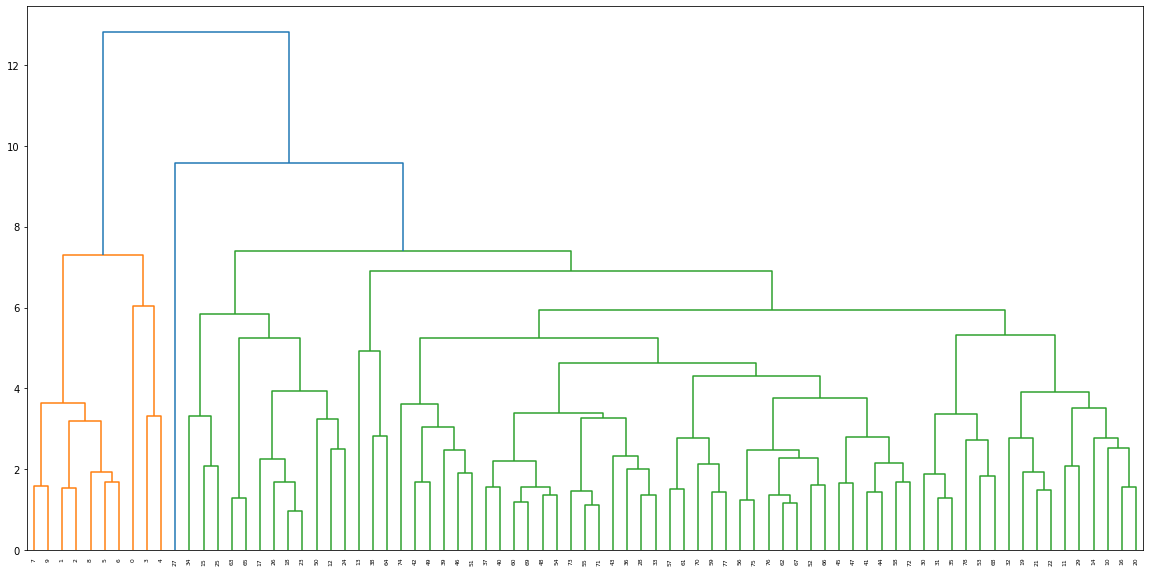

In [ ]:
# Complete Linkage
plt.figure(figsize = (20,10))
mergings = linkage(df_df1, method='complete',metric='euclidean')
dendrogram(mergings)
plt.show()

In [ ]:
from scipy.cluster.hierarchy import cut_tree

In [ ]:
# 4 clusters
cluster_labels = cut_tree(mergings, n_clusters=4).reshape(-1, )
cluster_labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 2, 1, 1, 2, 1, 2, 2, 1, 1, 1,
       1, 2, 2, 2, 2, 3, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [ ]:
# 3 clusters
cluster_labels3 = cut_tree(mergings, n_clusters=3).reshape(-1, )
cluster_labels3

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [ ]:
# assign cluster labels
df_hc = df.copy()
df_hc.head()
df_hc['Cluster_labels'] = cluster_labels
df_hc['Cluster_labels_3'] = cluster_labels3
df_hc.head()

,Player,Mat,Inns,NO,Runs,HS,Ave,BF,SR,100,50,0,Exp,Cluster_labels,Cluster_labels_3
0,SR Tendulkar (INDIA),463,452,41,18426,200,44.83,21367,86.23,49,96,20,23,0,0
1,KC Sangakkara (Asia/ICC/SL),404,380,41,14234,169,41.98,18048,78.86,25,93,15,15,0,0
2,RT Ponting (AUS/ICC),375,365,39,13704,164,42.03,17046,80.39,30,82,20,17,0,0
3,ST Jayasuriya (Asia/SL),445,433,18,13430,189,32.36,14725,91.20,28,68,34,22,0,0
4,DPMD Jayawardene (Asia/SL),448,418,39,12650,144,33.37,16020,78.96,19,77,28,17,0,0


In [ ]:
df_hc.columns

Index(['Player', 'Mat', 'Inns', 'NO', 'Runs', 'HS', 'Ave', 'BF', 'SR', '100',
       '50', '0', 'Exp', 'Cluster_labels', 'Cluster_labels_3'],
      dtype='object')

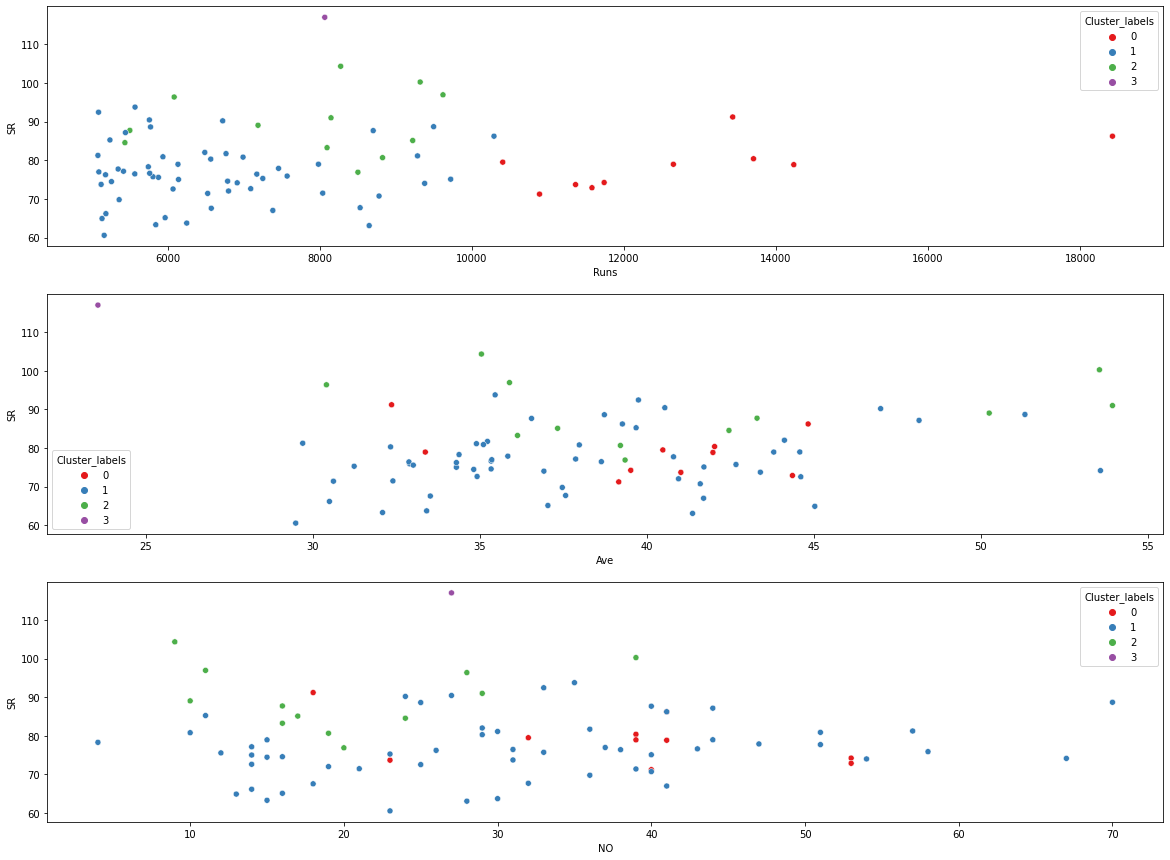

In [ ]:
# Scatter plot on Original attributes to visualize the spread of the data

plt.figure(figsize = (20,15))
plt.subplot(3,1,1)
sns.scatterplot(x = 'Runs', y = 'SR',hue='Cluster_labels',data = df_hc,legend='full',palette="Set1")
plt.subplot(3,1,2)
sns.scatterplot(x = 'Ave', y = 'SR',hue='Cluster_labels', data = df_hc,legend='full',palette="Set1")
plt.subplot(3,1,3)
sns.scatterplot(x = 'NO', y = 'SR',hue='Cluster_labels', data=df_hc,legend='full',palette="Set1")
plt.show()

In [ ]:
df_hc[df_hc['Cluster_labels']==0].sort_values(by = ['Mat','Ave','SR'], ascending = [False,False,False]).head()
#Can be Batsman Coach

,Player,Mat,Inns,NO,Runs,HS,Ave,BF,SR,100,50,0,Exp,Cluster_labels,Cluster_labels_3
0,SR Tendulkar (INDIA),463,452,41,18426,200,44.83,21367,86.23,49,96,20,23,0,0
4,DPMD Jayawardene (Asia/SL),448,418,39,12650,144,33.37,16020,78.96,19,77,28,17,0,0
3,ST Jayasuriya (Asia/SL),445,433,18,13430,189,32.36,14725,91.20,28,68,34,22,0,0
1,KC Sangakkara (Asia/ICC/SL),404,380,41,14234,169,41.98,18048,78.86,25,93,15,15,0,0
5,Inzamam-ul-Haq (Asia/PAK),378,350,53,11739,137,39.52,15812,74.24,10,83,20,16,0,0


In [ ]:
df_hc[df_hc['Cluster_labels']==1].sort_values(by = ['Mat','Ave','SR'], ascending = [False,False,False]).head()
#MiddleOrders

,Player,Mat,Inns,NO,Runs,HS,Ave,BF,SR,100,50,0,Exp,Cluster_labels,Cluster_labels_3
14,M Azharuddin (INDIA),334,308,54,9378,153,36.92,12669,74.02,7,58,9,15,1,1
10,TM Dilshan (SL),330,303,41,10290,161,39.27,11933,86.23,22,47,11,17,1,1
30,SR Waugh (AUS),325,288,58,7569,120,32.90,9971,75.91,3,45,15,16,1,1
16,PA de Silva (SL),308,296,30,9284,145,34.90,11443,81.13,11,64,17,19,1,1
20,Yuvraj Singh (Asia/INDIA),304,278,40,8701,150,36.55,9924,87.67,14,52,18,17,1,1


In [ ]:
df_hc[df_hc['Cluster_labels']==2].sort_values(by = ['Mat','Ave','SR'], ascending = [False,False,False]).head()
#Hitters

,Player,Mat,Inns,NO,Runs,HS,Ave,BF,SR,100,50,0,Exp,Cluster_labels,Cluster_labels_3
12,AC Gilchrist (AUS/ICC),287,279,11,9619,172,35.89,9922,96.94,16,55,19,12,2,1
17,CH Gayle (ICC/WI),269,264,17,9221,215,37.33,10834,85.11,22,47,23,16,2,1
50,BB McCullum (NZ),260,228,28,6083,166,30.41,6312,96.37,5,32,20,14,2,1
24,V Sehwag (Asia/ICC/INDIA),251,245,9,8273,219,35.05,7929,104.33,15,38,14,14,2,1
26,HH Gibbs (SA),248,240,16,8094,175,36.13,9721,83.26,21,37,22,14,2,1


In [ ]:
df_hc[df_hc['Cluster_labels']==3].sort_values(by = ['Mat','Ave','SR'], ascending = [False,False,False]).head()
#Hitters 2

,Player,Mat,Inns,NO,Runs,HS,Ave,BF,SR,100,50,0,Exp,Cluster_labels,Cluster_labels_3
27,Shahid Afridi (Asia/ICC/PAK),398,369,27,8064,124,23.57,6892,117.0,6,39,30,19,3,2


In [ ]:
df_hc.groupby('Cluster_labels').mean().T

Cluster_labels,0,1,2,3
Mat,379.500,223.071429,223.000000,398.00
Inns,361.900,208.000000,214.750000,369.00
NO,37.900,30.875000,19.833333,27.00
Runs,12841.900,6627.678571,7850.000000,8064.00
HS,164.700,137.517857,193.250000,124.00
Ave,39.911,37.924821,41.405833,23.57
BF,16268.900,8745.892857,8810.083333,6892.00
SR,78.722,76.499107,89.680000,117.00
100,23.100,8.214286,18.000000,6.00
50,80.300,41.660714,41.166667,39.00


In [ ]:
df_hc.groupby('Cluster_labels_3').mean().T

Cluster_labels_3,0,1,2
Mat,379.500,223.058824,398.00
Inns,361.900,209.191176,369.00
NO,37.900,28.926471,27.00
Runs,12841.900,6843.382353,8064.00
HS,164.700,147.352941,124.00
Ave,39.911,38.539118,23.57
BF,16268.900,8757.220588,6892.00
SR,78.722,78.825147,117.00
100,23.100,9.941176,6.00
50,80.300,41.573529,39.00


In [ ]:
# Final List of Players who can appointed in a new team for Batsman role

In [ ]:
FinalListbyHC=df_hc[df_hc['Cluster_labels']==2].sort_values(by = ['NO','Ave','SR'], ascending = [True,False,False])
FinalListbyHC['Player']
FinalListbyHC.reset_index(drop=True).Player[:]

0     V Sehwag (Asia/ICC/INDIA)
1                  HM Amla (SA)
2        AC Gilchrist (AUS/ICC)
3               MJ Guptill (NZ)
4                 HH Gibbs (SA)
5             CH Gayle (ICC/WI)
6             Saeed Anwar (PAK)
7                ME Waugh (AUS)
8             RG Sharma (INDIA)
9              BB McCullum (NZ)
10              V Kohli (INDIA)
11      AB de Villiers (Afr/SA)
Name: Player, dtype: object